In [5]:
# Objective: Introduce deep learning basics with neural networks. Build a simple neural network to classify handwritten digits using TensorFlow/Keras.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import fetch_openml

In [6]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.int64)

# Normalize pixel values (0-255) to (0-1) range
X = X / 255.0

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [7]:
# Build the Neural Network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8570 - loss: 0.4917 - val_accuracy: 0.9571 - val_loss: 0.1533
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9551 - loss: 0.1528 - val_accuracy: 0.9671 - val_loss: 0.1160
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9677 - loss: 0.1064 - val_accuracy: 0.9697 - val_loss: 0.0987
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9738 - loss: 0.0842 - val_accuracy: 0.9731 - val_loss: 0.0907
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9775 - loss: 0.0713 - val_accuracy: 0.9744 - val_loss: 0.0874
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9798 - loss: 0.0618 - val_accuracy: 0.9750 - val_loss: 0.0838
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9824 - loss: 0.0544 - val_accuracy: 0.9774 - val_loss: 0.0804
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9839 - loss: 0.0

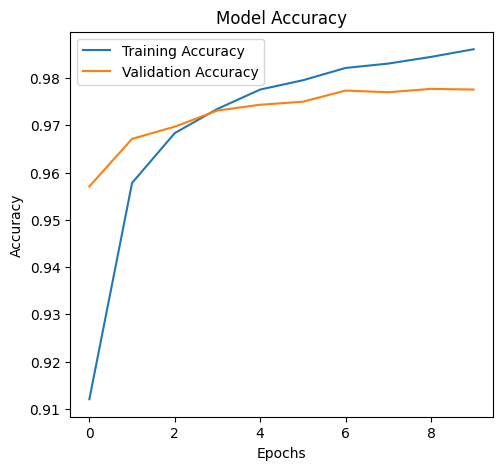

In [8]:
# Plot accuracy over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

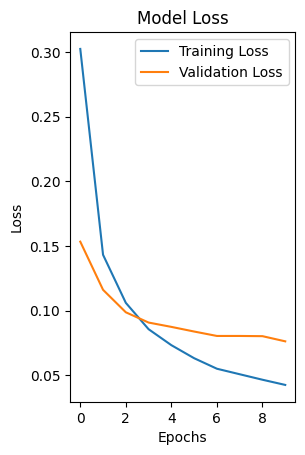

In [9]:
# Plot loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()